<a href="https://colab.research.google.com/github/NguyenHan243/ANN/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



In [3]:
x_train=x_train.reshape(50000,32*32*3)
x_train=x_train.astype('float32')/255
x_test=x_test.reshape(10000,32*32*3)
x_test=x_test.astype('float32')/255
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [4]:
class_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(32*32,)))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [8]:
import keras
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.2421 - loss: 2.0820 - val_accuracy: 0.3657 - val_loss: 1.7887
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.3539 - loss: 1.8039 - val_accuracy: 0.4138 - val_loss: 1.6881
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.3896 - loss: 1.7196 - val_accuracy: 0.4320 - val_loss: 1.6273
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.4073 - loss: 1.6696 - val_accuracy: 0.4477 - val_loss: 1.5781
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.4235 - loss: 1.6256 - val_accuracy: 0.4506 - val_loss: 1.5519
Epoch 6/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4359 - loss: 1.5885 - val_accuracy: 0.4644 - val_loss: 1.5311
Epoch 7/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.4502 - loss: 1.5519 - val_accuracy: 0.4760 - val_loss: 1.4975
Epoch 8/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.4615 - loss: 1

In [9]:
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np
import cv2
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (32, 32))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255.0
    img = img.flatten()
    img=img.reshape(1, 32*32)
    return img
def predict_image(image_path):
    processed_img = preprocess_image(image_path)
    processed_img = processed_img.reshape(1, 32*32)
    prediction = model.predict(processed_img)
    predicted_image = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
    plt.show()
    return predicted_image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


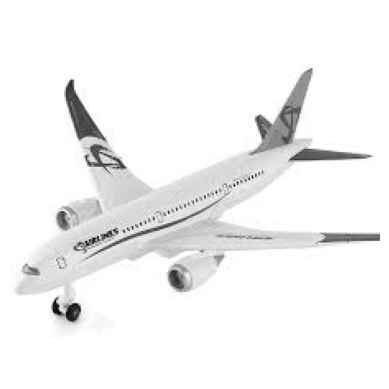

Predicted image: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


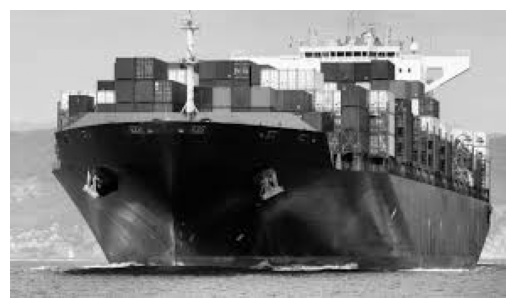

Predicted image: 9


In [ ]:
image_path=["/content/b6.jfif","/content/tauu.jfif","/content/hu.jfif","/content/chimm.jfif","/content/oto.jfif","/content/dg.jfif","/content/fro.jfif","/content/ngua.jfif","/content/meo3.jfif","/content/truck.jfif"]
for path in image_path:
    predicted_image = predict_image(path)
    print(f"Predicted image: {predicted_image}")